# Analyse Pricipla Component (PCA)

L'analyse en composantes principales (PCA pour Principal Component Analysis) est une méthode de réduction de dimension qui consiste à transformer des variables corrélées en nouvelles variables décorrélées les unes des autres.

Il s’agit de résumer l’information contenue dans un ensemble de données en un certain nombre de variables synthétiques, combinaisons linéaires des variables originelles : ce sont les Composantes Principales. Si l'on adopte un point de vue un peu plus mathématique, l'idée est de projeter l'ensemble des données sur l'espace vectoriel de dimension n le plus proche des données où n est le nombre de facteurs choisis lorsqu'on applique la PCA. Les vecteurs directeurs de cet espace vectoriel sont les Composantes Principales.

Le choix du nombre de facteurs est important. L’enjeu est généralement de réduire de manière significative la dimension du jeu de données tout en conservant au maximum l'information véhiculée par les données. On parle de part de variance expliquée. L'interprétation géométrique de la part de variance expliquée est l'espacement des points dans l'espace. Dans le dataset initial, les points sont espacés les uns des autres d'une certaine façon. L'idée de la PCA est de projeter orthogonalement notre dataset sur un espace vectoriel de façon à conserver au maximum l'espacement entre nos différents points lors de la projection. C'est le choix de l'espace vectoriel sur lequel on projette nos données (donc le choix des composantes principales) qui est déterminant pour maximiser la part de variance expliquée lors de la projection. Le rôle de la PCA est de trouver les composantes principales optimales.

Dans les ensembles de données de grande dimension, il est très difficile de visualiser les données de manière efficace. Une façon d'y parvenir est de générer des diagrammes de dispersion bidimensionnels contenant tous les points de données pour chaque paire de caractéristiques possibles. Cependant, cette technique trouve rapidement ses limites lorsque la dimension du jeu de données augmente. Il peut alors être intéressant d'utiliser la PCA, en projetant les données sur 2 ou 3 axes, pour se faire une représentation visuelle du jeu de données. Cela permet parfois d'identifier des structures intéressantes et d'adapter au mieux le choix de son algorithme d'apprentissage par la suite.

# Cas pratique

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/sonar.csv')
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df['Label'] = df['Label'].map({'R':0, 'M':1})

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)

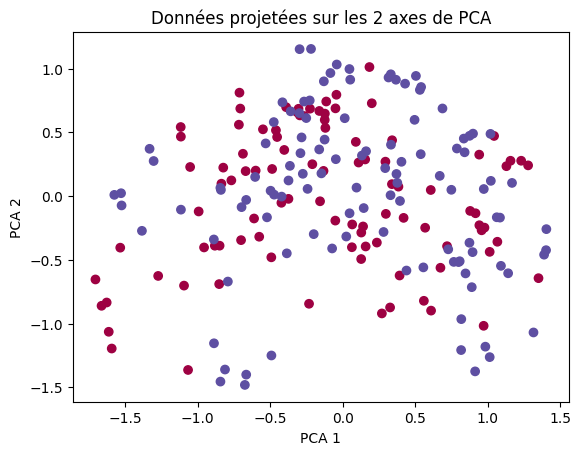

La part de variance expliquée est 0.61


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_3 = pca.fit_transform(X)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_3[:, 0], data_3[:, 1], c = y, cmap=plt.cm.Spectral)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

print("La part de variance expliquée est", round(pca.explained_variance_ratio_.sum(),2))

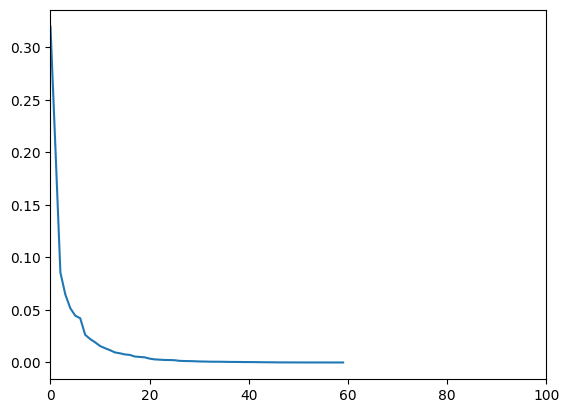

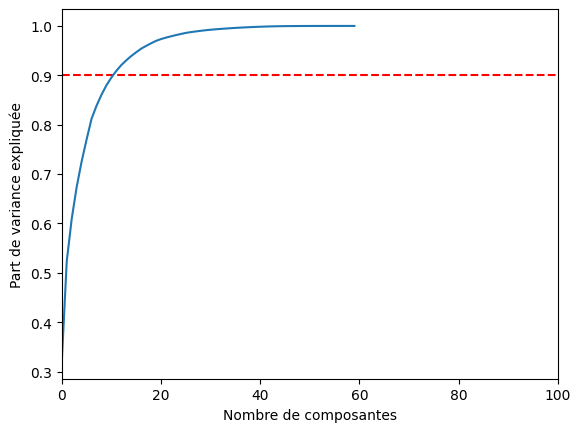

In [14]:
pca = PCA()
pca.fit(X)

plt.figure()
plt.xlim(0,100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0,100)
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());


In [13]:
pca = PCA(n_components = 0.9)
pca.fit(X)
print("Nombre de composantes retenues :", pca.n_components_)

Nombre de composantes retenues : 12


Donc en 12 varaible qui exprime déjâ 90% des données.
on va essayer avec le modèle ML.


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",2
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [26]:
print(knn.score(X_test, y_test))
print(X_train.shape)

0.7857142857142857
(166, 60)


maintenant on va faire mais avec PCA

In [27]:
pca = PCA(n_components= 0.9) # 90% des valeurs
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca.shape

(166, 11)

In [28]:
knn1 = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_pca,y_train)
knn.score(X_test_pca, y_test)

0.8333333333333334

On obtient une résultat un peu près similaire mais la réduction des variable est passé de 60 à 11 donc avec une réduction de dimension qui garde les informations et réduit le charge de travail de notre modèle.

# LDA

L'analyse discriminante linéaire (LDA, Linear Discriminant Analysis en anglais) fonctionne sur le même principe que la PCA : la décomposition matricielle permet de projeter les données sur un hyperplan de l'espace original. Cependant, là où la PCA peut s'appliquer sur toutes sortes de données, la LDA nécessite des données étiquetées. L'idée derrière cet algorithme est de projeter les données de telle sorte que la variance au sein d'une classe soit la plus faible possible, tout en maximisant la variance entre les classes. La LDA est donc un algorithme supervisé à l'inverse de la PCA qui est un algorithme non supervisé.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

n_features = X_train.shape[1]
print(n_features)
n_classes = np.unique(y_train).size
max_components = min(n_features, n_classes - 1)
print(max_components)

lda = LDA(n_components=max_components)

X_train_lda = lda.fit_transform(X_train,y_train)
X_test_lda = lda.transform(X_test)

X_train_lda.shape

60
1


(166, 1)

In [32]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train_lda, y_train)
knn2.score(X_test_lda, y_test)

0.8095238095238095

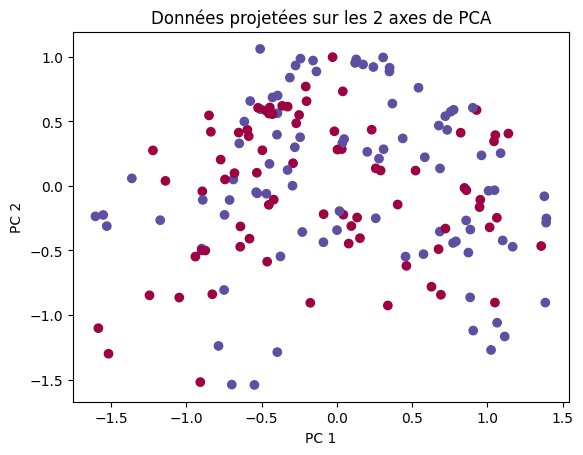

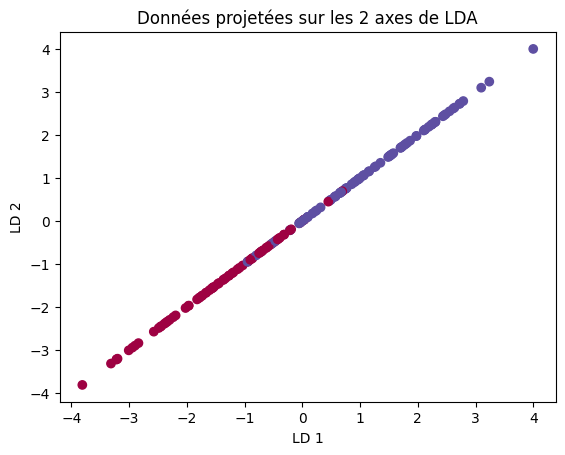

In [37]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Données projetées sur les 2 axes de PCA")
plt.show();

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_lda[:, 0], X_train_lda[:, -1], c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')

ax.set_title("Données projetées sur les 2 axes de LDA")
plt.show();
